In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report


In [ ]:
df = pd.read_csv("D:/Heart_Disease_Project/data/heart_disease_reduced.csv")
X = df.drop("num", axis=1)
y = df["num"]

In [13]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


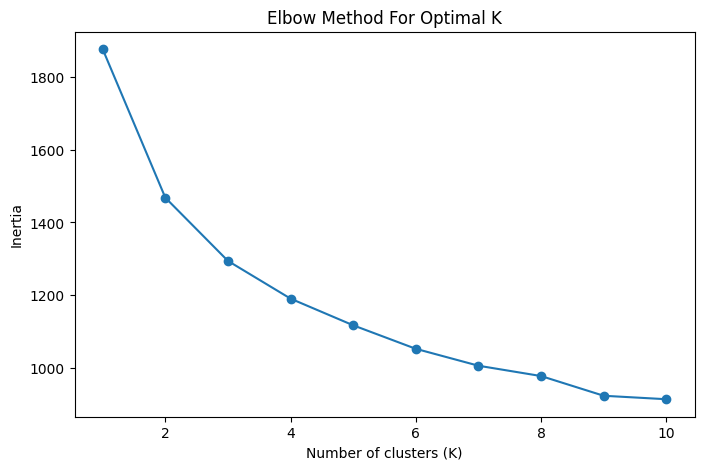

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

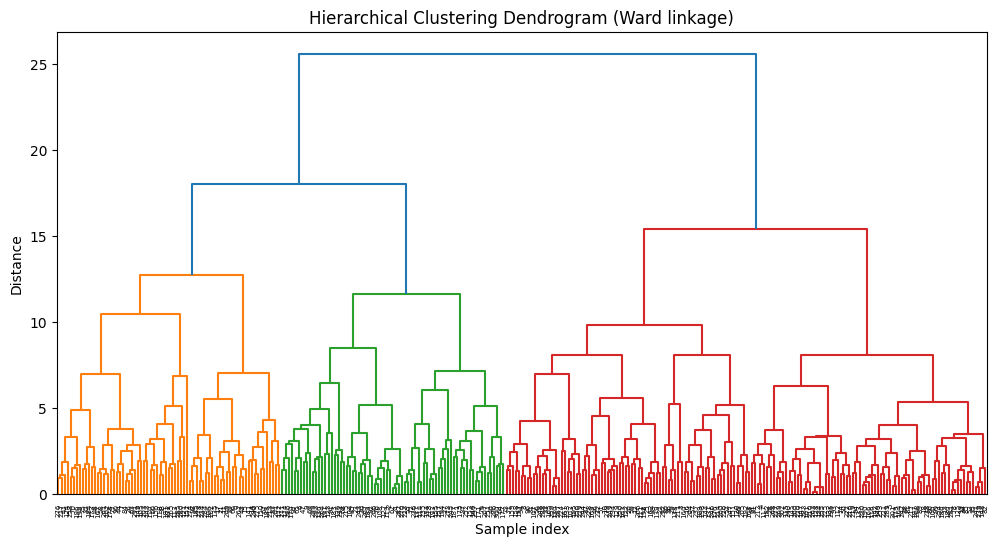

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram (Ward linkage)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [16]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X)

ari = adjusted_rand_score(y, cluster_labels)
print(f"Adjusted Rand Index (ARI) between clusters and actual labels: {ari:.3f}")

comparison = pd.crosstab(y, cluster_labels, rownames=['Actual Label'], colnames=['Cluster Label'])
print(comparison)

Adjusted Rand Index (ARI) between clusters and actual labels: 0.147
Cluster Label   0   1   2   3
Actual Label                 
0               5  41  27  91
1              45  26  47  21
